In [61]:
import pandas as pd
import fpsnippets as fp
from matplotlib import pyplot as plt

In [3]:
fish = pd.read_csv("datasets/FishFry.csv")

In [4]:
fish.head(10)

,_id,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,menu_text,...,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,8680,t,"St. Peter Church, St. Faustina Parish",Church,"670 South Main Street, Slippery Rock, Pennsylv...",https://stfaustinaparish.org/,"Friday Feb 24 from 4:00 PM to 7:00 PM, Friday ...",NaN,https://stfaustinaparish.org/,"$12 per meal, \nALL YOU CAN EAT $18\nKids unde...",...,NaN,NaN,t,NaN,f,NaN,t,NaN,41.056430,-80.050690
1,8681,f,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-...,"Friday Feb 24 from 4:00 PM to 8:00 PM, Friday ...",NaN,NaN,NaN,...,NaN,f,t,NaN,f,NaN,f,NaN,40.352969,-79.767295
2,8682,t,"Our Lady of Joy Church, Holy Family Parish",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 22 from 4:00 PM to 7:00 PM, Frid...",NaN,chrome-extension://efaidnbmnnnibpcajpcglclefin...,"Hand breaded fish dinner $14 includes fries, s...",...,NaN,NaN,t,NaN,f,NaN,t,NaN,40.480007,-79.719563
3,8683,f,St. John Benwood,Church,"700 Main Street, Benwood, West Virginia 26031,...",https://www.facebook.com/stjohnparishbenwoodwv/,"Wednesday Feb 22 from 11:00 PM to 11:00 PM, Fr...",NaN,https://www.facebook.com/stjohnparishbenwoodwv...,NaN,...,NaN,NaN,t,NaN,t,NaN,f,NaN,40.016004,-80.734844
4,8684,t,St. Francis of Assisi Parish,Unsure / N/A,"120 Barron Avenue, Johnstown, Pennsylvania 159...",NaN,"Friday Feb 24 from 2:00 PM to 6:00 PM, Friday ...",NaN,NaN,NaN,...,NaN,f,t,f,f,NaN,t,NaN,40.344110,-78.943030
5,8685,t,Catatouille Food Truck - VEGAN,Unsure / N/A,"4016 Butler Street, Pittsburgh, Pennsylvania 1...",NaN,"Friday Feb 24 from 5:00 PM to 9:00 PM, Friday ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,40.468925,-79.961495
6,8686,t,Bobtown and Dunkard Twp Volunteer Fire,Fire Department,"1 Larimer Ave Bobtown, Pa 15315",https://www.facebook.com/Bobtown-Dunkard-Towns...,"Wednesday Feb 22 from 11:00 AM to 7:00 PM, Fri...",NaN,https://www.facebook.com/186206404761913/photo...,https://www.facebook.com/photo/?fbid=567077565...,...,NaN,f,t,f,t,NaN,t,NaN,39.759173,-79.980159
7,8687,t,Eat'n Park Cannonsburg,Restaurant,"3380 Washington Road, McMurray, Pennsylvania 1...",www.eatnpark.com,NaN,NaN,https://www.eatnpark.com/menu/what's-new,NaN,...,NaN,f,t,f,t,t,t,NaN,40.287630,-80.117170
8,8688,t,"St. Patrick, Canonsburg",Church,"317 W Pike St, Canonsburg, PA 15317",https://romeroparish.org/,"Wednesday Feb 22 from 11:00 AM to 7:00 PM, Fri...",NaN,https://romeroparish.org/fishfry,NaN,...,NaN,f,t,f,t,NaN,t,NaN,40.258009,-80.195076
9,8689,t,"St. Malachy Church, Archangel Gabriel Parish",Church,"343 Forest Grove Road Kennedy Township, PA",https://www.archangelgabrielparish.org/,"Friday Mar 4 from 12:00 PM to 7:00 PM, Friday ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,40.477630,-80.103130


In [5]:
ll = fish.iloc[:, 20:]
neighborhoods = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 0], ll.iloc[x, 1])
    if loc in neighborhoods:
        neighborhoods[loc] += 1
    elif loc != None:
        neighborhoods[loc] = 1

In [6]:
print(neighborhoods)

{'Central Lawrenceville': 1, 'Windgap': 1, 'Point Breeze North': 1, 'Central Business District': 5, 'Brookline': 2, 'Garfield': 1, 'East Allegheny': 2, 'South Side Flats': 3, 'Beechview': 3, 'Elliott': 2, 'Banksville': 1, 'Morningside': 1, 'North Oakland': 1, 'Hazelwood': 1, 'Lincoln-Lemington-Belmar': 1, 'Strip District': 2, 'Troy Hill': 2, 'Sheraden': 1, 'Shadyside': 1, 'Polish Hill': 1}


In [100]:
n = pd.DataFrame(neighborhoods.items())

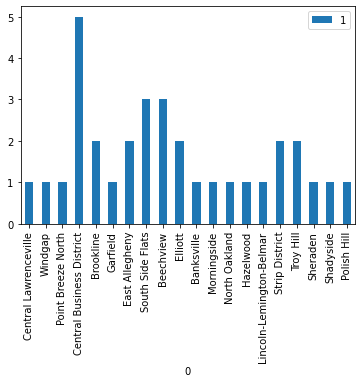

In [101]:
n.plot.bar(x=0)

PogoPark

In [102]:
pogo = pd.read_csv("datasets/POGOHPARK.csv")

In [103]:
pogo.head(10)

,_id,Id,Name,Total Docks,Latitude,Longitude
0,1,1,Pierce St & Summerlea St,19,40.456507,-79.932331
1,2,2,Eliza Furnace Trail & Swineburne St,15,40.425800,-79.953400
2,3,3,Centre Ave & Addison St,15,40.444600,-79.978300
3,4,4,Burns White Center at 3 Crossings,15,40.456400,-79.980000
4,5,5,Allegheny Station,19,40.448301,-80.018007
5,6,6,10th St & Penn Ave,15,40.444653,-79.996074
6,7,7,Liberty Ave & Gross St,15,40.459588,-79.945204
7,8,8,Glasshouse,15,40.432900,-80.003000
8,9,9,South Side Trail & S 4th St,15,40.431336,-79.995106
9,10,10,Zulema St & Coltart Ave,19,40.436055,-79.956827


In [105]:
ll = pogo.iloc[:, 4:]
neighborhoods = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 0], ll.iloc[x, 1])
    if loc in neighborhoods:
        neighborhoods[loc] += 1
    elif loc != None:
        neighborhoods[loc] = 1

In [107]:
n = pd.DataFrame(neighborhoods.items())

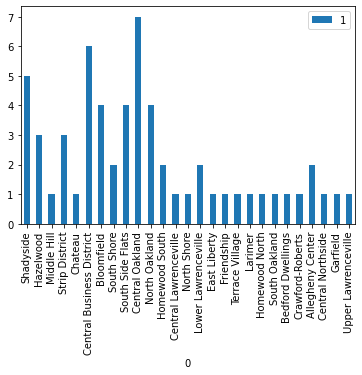

In [108]:
n.plot.bar(x=0)

Ballfields

In [109]:
ball = pd.read_csv("datasets/Ballfields.csv")

In [110]:
ball.head(10)

,_id,field_name,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active
0,2773,McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes
1,2774,Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes
2,2775,Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes
3,2776,Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes
4,2777,Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes
5,2778,Overbrook Field 1,-79.997647,40.390765,6,0.0,0.0,6.0,6.0,88,0.0,0.0,0.0,1.342490e+06,393172.351702,Overbrook #1,P360,Yes
6,2779,Panorama,-79.922838,40.392530,7,0.0,0.0,7.0,7.0,90,0.0,0.0,0.0,1.363337e+06,393293.896078,Panorama,P362,Yes
7,2780,Overbrook Field 2,-79.997714,40.391665,8,0.0,0.0,8.0,8.0,89,0.0,0.0,0.0,1.342480e+06,393500.692909,Overbrook #2,P361,Yes
8,2781,Dan McGibbeny,-80.007422,40.391495,9,0.0,0.0,9.0,9.0,21,0.0,0.0,0.0,1.339775e+06,393507.785414,Danny McGibbeny Memorial Field,P294,Yes
9,2782,Phillips Park,-79.991223,40.392790,10,0.0,0.0,10.0,10.0,93,0.0,0.0,0.0,1.344298e+06,393864.378861,Phillips,P365,Yes


In [118]:
ll = ball.iloc[:, 2:4]
neighborhoods = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 1], ll.iloc[x, 0])
    if loc in neighborhoods:
        neighborhoods[loc] += 1
    elif loc != None:
        neighborhoods[loc] = 1

In [121]:
n = pd.DataFrame(neighborhoods.items())

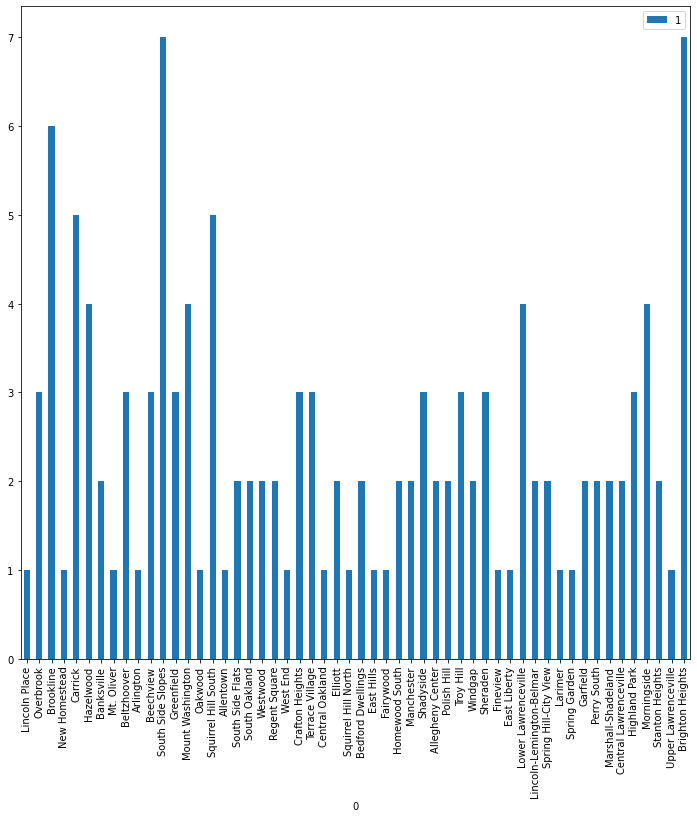

In [124]:
n.plot.bar(x=0, figsize=(12,12))

Pools

In [125]:
pools = pd.read_csv("datasets/Pools.csv")

In [126]:
pools.head(10)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,4,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,5,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
5,6,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
6,7,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
7,8,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
8,9,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
9,10,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454370,-79.899884


In [136]:
ll = pools.iloc[:, 16:]
neighborhoods = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 0], ll.iloc[x, 1])
    if loc in neighborhoods:
        neighborhoods[loc] += 1
    elif loc != None:
        neighborhoods[loc] = 1

In [138]:
n = pd.DataFrame(neighborhoods.items())

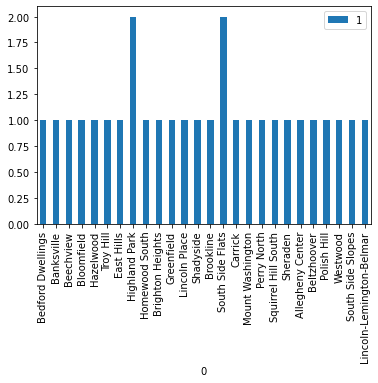

In [139]:
n.plot.bar(x=0)

MAX FISHFRY: Central Business District (5)

MAX POGOHPARK: Central Oakland (7), Central Business District (6)

MAX BALLFIELDS: Brighton Heights / South Side Slopes (7), Brookline (6)

MAX POOLS: Highland Park / South Side Flats (2)